In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_path= "c:/Windows/Fonts/malgun.ttf"   #폰트파일의위치
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

file_path = '전국통합식품영양성분정보(가공식품)표준데이터.csv'

In [30]:
# 한글 깨짐으로 인한 인코딩 형식 변경(CP949)
df = pd.read_csv(file_path, encoding='EUC-KR')

In [31]:
# 데이터 컬럼 선택 (값이 없거나 불필요한 데이터 삭제)
df = df[['식품명','에너지(kcal)', '단백질(g)', '지방(g)', '탄수화물(g)', '당류(g)', '나트륨(mg)', '콜레스테롤(mg)', '포화지방산(g)','트랜스지방산(g)']]

In [64]:
# 선택된 데이터가 1개 이상인 경우 선택기 실행 / 아닌 경우 출력
def select_ck(find_data) :
    if len(find_data) > 1:
        select_data(find_data, 0)
    else :
        show_data(find_data, 0)
        
def select_data(find_data, now) :
    # now는 현재 행에서의 10개의 출력
    first = now * 10;
    end = now * 10 + 10;
    sel_max = len(find_data)
    
    if sel_max < end :
        end = sel_max
    
    print ("------------------------------------------")
    for a in range(first, end):
        print("[" + str(a) + "]" + str(find_data.iloc[a]['식품명']))
    print ("------------------------------------------")

    if (sel_max == end) :
        ck = input("품목을 선택해주세요 >> ");
        show_data(find_data, int(ck))
    else :
        ck = input("품목을 선택해주세요 ('-'은 다음)\n[데이터 개수 : " + str(sel_max) + "] >> ");
        if (ck == '-') :
            select_data(find_data, now + 1)
        else :
            show_data(find_data, int(ck))

In [ ]:
# 선택한 데이터 및 그래프 출력
def show_data(find_data, val):
    find_data.set_index('식품명', inplace=True)
    
    # 검색된 데이터 중 선택한 식품 영양성분 가져오기
    tb = find_data.iloc[val]
    
    # 좌측에 이름 뜨는 거 없애기
    name = tb.name
    tb.name = ''
    
    # 데이터 정렬 [내림차순]
    tb = tb.sort_values(ascending=False)
    
    # 1% 미만은 %를 띄우지 않음
    def autopct_func(pct):
        if pct >= 1:
            return '%.1f%%' % pct
        else:
            return ''
    
    # 그래프 설정 [autopct = 함수로 부분적으로 띄우기, labels = label 크기만큼 함수 반복 -> ]
    tb.plot(kind='pie', figsize=(10, 4),
           autopct=autopct_func,
            labels=[''] * len(tb),
           startangle=90)
    
    # 그래프 출력
    plt.title(name, size=20)
    plt.axis('equal')
    
    plt.legend(labels=tb.index, loc='center right')
    
    # 출력 : 다시 이름 돌려두기
    tb.name = name;
    plt.show()
    print(tb)

검색할 데이터를 입력하세요 : 감자
------------------------------------------
[0]기타가공품_감자전믹스
[1]기타가공품_초간편 감자수제비키트
[2]기타가공품_초간편 감자전 믹스
[3]기타가공품_감자전
[4]기타 즉석식품_DIY 감자 고슴도치 만들기 세트
[5]기타 즉석식품_아침 감자
[6]기타 즉석식품_찐감자
[7]기타 즉석식품_점보3단샌드 햄감자맛살
[8]기타 즉석식품_꽃카포슬감자샌드
[9]만두_쓴메밀감자찐만두
------------------------------------------
품목을 선택해주세요 ('-'은 다음)
[데이터 개수 : 463] >> 3


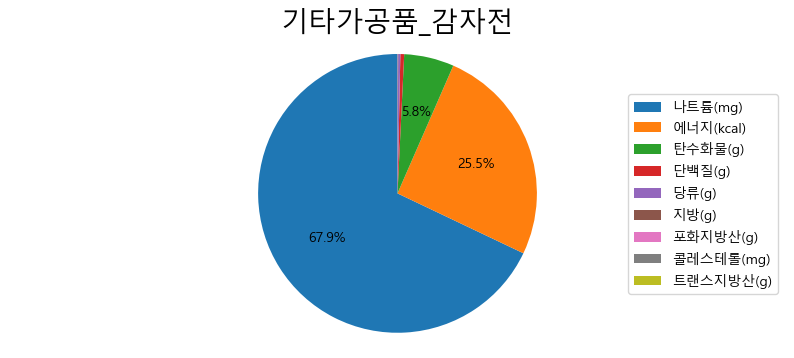

나트륨(mg)      900.00
에너지(kcal)    338.00
탄수화물(g)       76.67
단백질(g)         5.83
당류(g)          3.33
지방(g)          0.67
포화지방산(g)       0.33
콜레스테롤(mg)      0.00
트랜스지방산(g)      0.00
Name: 기타가공품_감자전, dtype: float64


In [65]:
find = input("검색할 데이터를 입력하세요 : ")
find_data = df[df['식품명'].str.contains(find)]
select_data(find_data, 0)